In [22]:
%pip install fastai --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tqdm import tqdm
import math
from pathlib import Path
from fastai import *
from fastai.vision.all import *
from fastai.data.all import *
from pathlib import Path

In [3]:
import warnings
import os
import numpy as np
import torch

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
data_path = Path('./data/new_crops/')

In [7]:
from utils import load_images_recursively

images, _ = load_images_recursively(data_path)
len(images)//2

1271

In [9]:
dls = ImageDataLoaders.from_folder(path=data_path, item_tfms=Resize(224), valid_pct=0.2, seed=42, device=device)

In [10]:
batch = dls.one_batch()

In [11]:
batch[1]

TensorCategory([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0')

In [12]:
batch[0].shape

torch.Size([64, 3, 224, 224])

In [13]:
fns = get_image_files(data_path)

In [ ]:
verify_images??

In [14]:
failed = verify_images(fns)

In [15]:
failed

(#0) []

In [16]:
failed.map(Path.unlink);

In [17]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=seed),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [18]:
dls = db.dataloaders(data_path)

/home/21rfk/project/mtcnn-pytorch/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [19]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.004365158267319202)

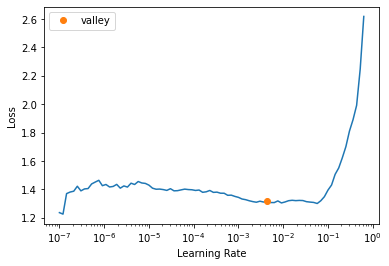

In [31]:
learn.lr_find()

In [21]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=3e-3)
learn.fine_tune(2, freeze_epochs=6)

epoch,train_loss,valid_loss,accuracy,time
0,1.184962,0.780478,0.551181,00:03
1,1.112306,0.782996,0.598425,00:03
2,1.065967,0.829262,0.584646,00:03
3,1.013260,0.758254,0.620079,00:03
4,0.934080,0.724883,0.606299,00:03
5,0.854689,0.671881,0.616142,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.718646,0.670467,0.643701,00:04
1,0.672746,0.664961,0.641732,00:04


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

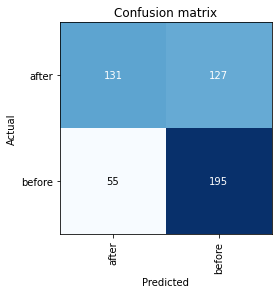

In [24]:
interp.plot_confusion_matrix()

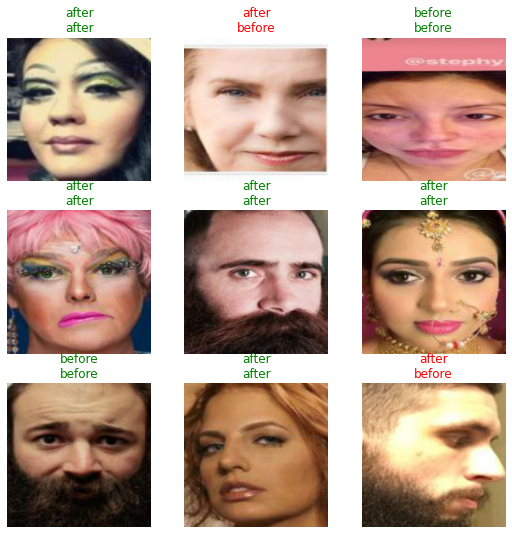

In [25]:
learn.show_results()